<a href="https://colab.research.google.com/github/Agni04/Page_Time_Visualizer/blob/main/Page_Time_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Impoting Files:**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fcc-forum-pageviews.csv to fcc-forum-pageviews.csv


Importing libraries:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Import data (Make sure to parse dates. Consider setting index column to 'date'.):

In [ ]:
df =pd.read_csv("fcc-forum-pageviews.csv",index_col='date',parse_dates=['date'])
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


Clean data:

In [ ]:
df =df[(df['value']>=df['value'].quantile(0.025)) &
      (df['value']<=df['value'].quantile(0.975))]

**Draw Plots**

Text(0, 0.5, 'Page Views')

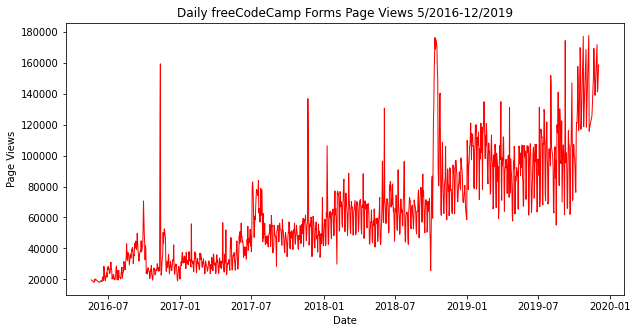

In [ ]:
plt.figure(figsize=(10,5))
x=df.index
y=df['value']
fig=plt.plot(x,y,color='red'
           ,linewidth=1) 
plt.title("Daily freeCodeCamp Forms Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")

Save image


In [ ]:
plt.savefig('line_plot.png')

<Figure size 432x288 with 0 Axes>

**Draw Bar plot:**

Copy and modify data for monthly bar plot :

In [ ]:
df['month']=df.index.month_name()

df['year']=df.index.year
df_bar=df.groupby(["year","month"])["value"].mean()
df_bar= df_bar.unstack()

<ipython-input-9-c352b9cde1cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df.index.month_name()
<ipython-input-9-c352b9cde1cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df.index.year


Draw bar plot #pallete= ["Jan", "Feb", "Mar", ### "Oct", "Nov", "Dec"]

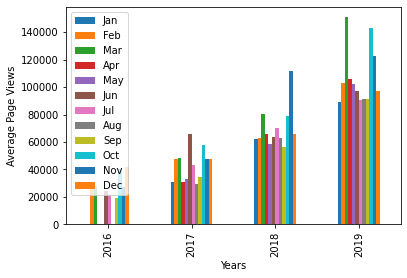

In [ ]:

fig=df_bar.plot(kind='bar',stacked=False)
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
"Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],loc='upper left')
plt.show()


Save image

In [ ]:
plt.savefig('bar_plot.png')

<Figure size 432x288 with 0 Axes>

**Draw Box Plot:**

Prepare data for box plots

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]


Draw box plots (using Seaborn):

[Text(0, 0.5, 'Page Views'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

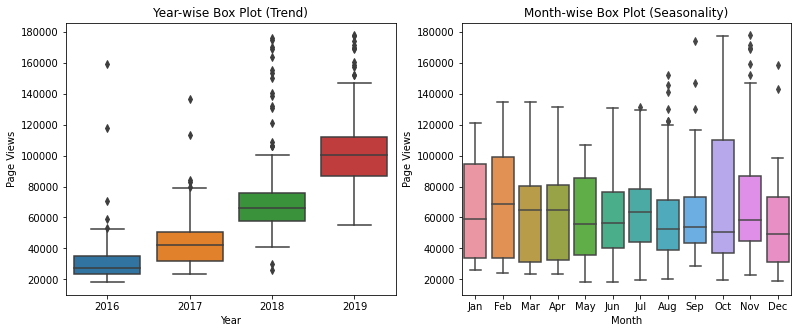

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(13,5))
sns.boxplot(y='value',x='year',data=df_box,ax=axes[0]).set(xlabel='Year',ylabel='Page Views',title="Year-wise Box Plot (Trend)")
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep",
               "Oct","Nov", "Dec"]
sns.boxplot(y='value',x='month',data=df_box,order=month_order,ax=axes[1]).set(xlabel='Month',
ylabel='Page Views',title='Month-wise Box Plot (Seasonality)')


Save image 

In [ ]:
plt.savefig('box_plot.png')

<Figure size 432x288 with 0 Axes>